In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [28]:
from random import random
tips['test']=tips['total_bill'].apply(lambda x:x*random())
tips.head()


,total_bill,tip,sex,smoker,day,time,size,test
0,16.99,1.01,Female,No,Sun,Dinner,2,0.864261
1,10.34,1.66,Male,No,Sun,Dinner,3,6.846527
2,21.01,3.50,Male,No,Sun,Dinner,3,1.523390
3,23.68,3.31,Male,No,Sun,Dinner,2,16.076465
4,24.59,3.61,Female,No,Sun,Dinner,4,16.570494


### 分布直方图 离散连续均可
+ bins柱数
+ kde是高斯分布密度图，绘图在0-1之间,拟合线频率
+ hist是否画直方图
+ rug在X轴上画一些分布线，反映聚集程度
+ fit可以制定某个分布进行拟合
+ label 搭配legend
+ axlabel制定横轴的说明 否则为默认标签
+ vertical是否转置
+ kde_kws={'shade':True}

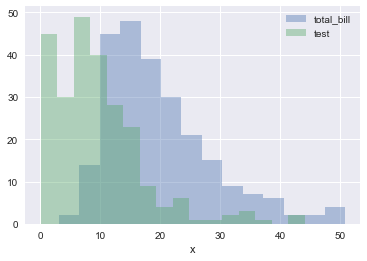

In [31]:
# plt.subplot(1,2,1)
# sns.distplot(tips['total_bill'], bins=None, hist=True, kde=True, rug=False, fit=None, 
#             hist_kws=None, kde_kws=None, rug_kws=None, 
#             fit_kws=None, color=None, vertical=False, 
#             norm_hist=False, axlabel='bill', label=None, ax=None)
# plt.subplot(1,2,2)
sns.distplot(tips['total_bill'], bins=None, hist=True, kde=False, rug=False, fit=None, 
            hist_kws=None, kde_kws=None, rug_kws=None, 
            fit_kws=None, color=None, vertical=False, 
            norm_hist=False, axlabel='x', label='total_bill', ax=None)
sns.distplot(tips['test'], bins=None, hist=True, kde=False, rug=False, fit=None, 
            hist_kws=None, kde_kws=None, rug_kws=None, 
            fit_kws=None, color=None, vertical=False, 
            norm_hist=False, axlabel='x', label='test', ax=None)
plt.legend()

C:\Users\pc1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


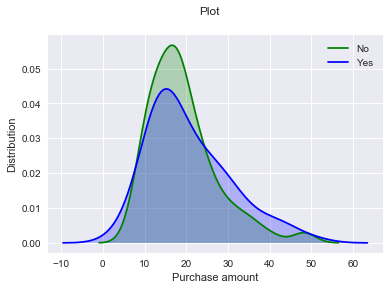

In [53]:
fig=sns.kdeplot(tips['total_bill'][tips['smoker']=='No'], label="No",color='g',shade=True)
fig=sns.kdeplot(tips['total_bill'][tips['smoker']=='Yes'],label="Yes",color='b',shade=True)
fig.figure.suptitle("Plot")
plt.xlabel('Purchase amount')
plt.ylabel('Distribution')
plt.legend()

### 类别属性在某一属性下的分布情况

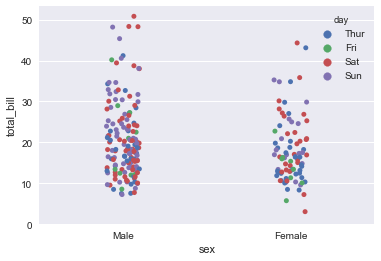

In [77]:
 ax = sns.stripplot(x='sex', y='total_bill', hue='day', data=tips, order=None, 
                      hue_order=None, jitter=True, 
                      split=False, orient=None, 
                      color=None, palette=None, size=5, 
                      edgecolor="gray", linewidth=0, 
                      ax=None)

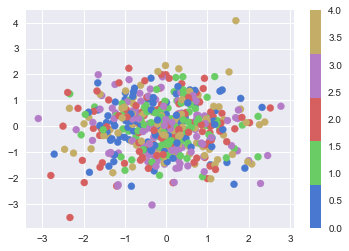

In [56]:
from matplotlib.colors import ListedColormap
import numpy as np
N = 500
current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
data1 = np.random.randn(N)
data2 = np.random.randn(N)
colors = np.random.randint(0,5,N)
plt.scatter(data1, data2, c=colors, cmap=cmap)
plt.colorbar()
plt.show()


### 线性拟合
回归直线，以及95%置信区间的范围
http://blog.sina.com.cn/s/blog_97d042500101gnss.html

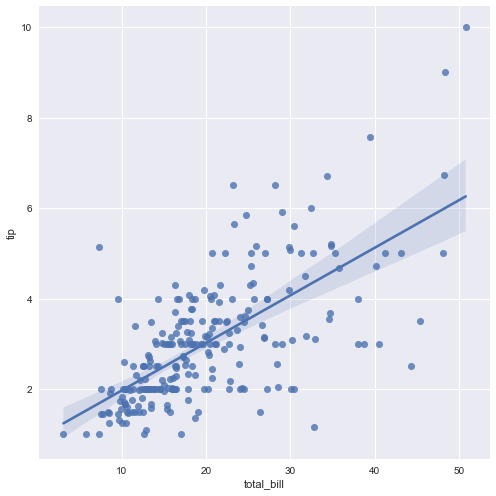

In [80]:
grid = sns.lmplot('total_bill','tip' , tips, size=7, truncate=True, scatter_kws={"s": 50})
grid.figuresize=(3*3)
plt.show()

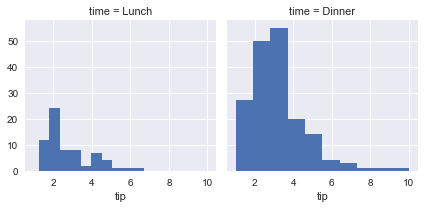

In [75]:
#子集分类
g = sns.FacetGrid(tips, col='time')    #只是将grid初始化，并不绘图
g.map(plt.hist, 'tip')

### Joint swarm strip
http://blog.csdn.net/u013082989/article/details/73278458


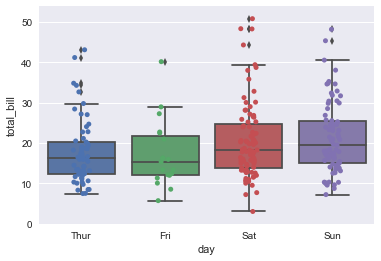

In [81]:
tips = sns.load_dataset('tips')
ax = sns.boxplot(x='day', y='total_bill', hue=None, data=tips, order=None, 
                    hue_order=None, orient=None, 
                    color=None, palette=None, 
                    saturation=.75, width=.8, 
                    fliersize=5, linewidth=None, 
                    whis=1.5, notch=False, ax=None)
sns.stripplot(x='day', y='total_bill', hue=None, data=tips, order=None, 
                 hue_order=None, jitter=True, split=False, 
                 orient=None, color=None, palette=None, 
                 size=5, edgecolor="gray", linewidth=0, 
                 ax=None)
sns.plt.show()

[None, None, None, None, None, None, None, None]

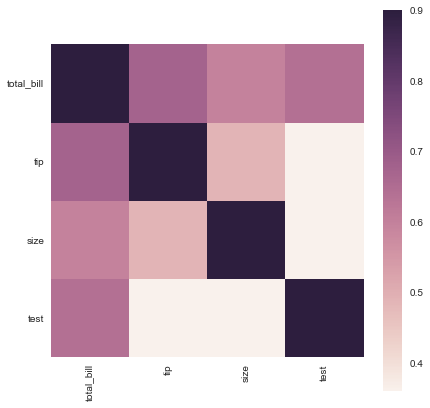

In [71]:
corrmat = tips.corr()
f,ax = plt.subplots(figsize=(7,7))
ax.set_xticklabels(corrmat,rotation='horizontal')
sns.heatmap(corrmat, vmax =0.9,square=True)
label_y = ax.get_yticklabels()
plt.setp(label_y , rotation = 360)
label_x = ax.get_xticklabels()
plt.setp(label_x , rotation = 90)

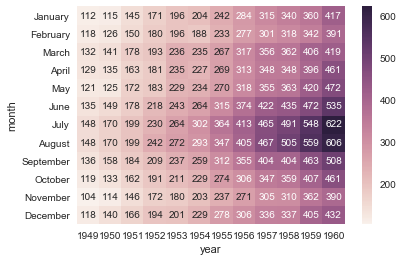

In [83]:
#三维图像的表示方法
flight = sns.load_dataset('flights')
flights = flight.pivot('month','year','passengers')
sns.heatmap(flights, annot=True, fmt='d')

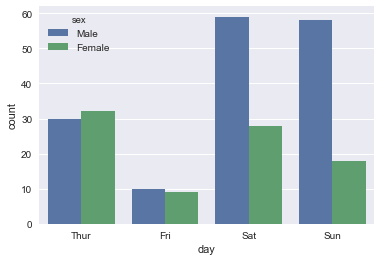

In [84]:
sns.countplot(x='day', hue='sex', data=tips)
sns.plt.show()  

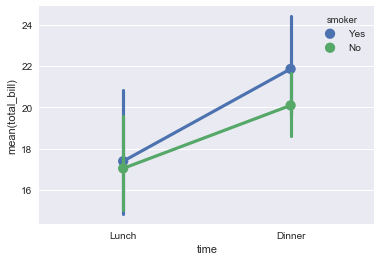

In [85]:
tips = sns.load_dataset('tips')
sns.pointplot(x='time', y='total_bill', hue='smoker', data=tips, order=None, 
                 hue_order=None, estimator=np.mean, ci=95, 
                 n_boot=1000, units=None, markers="o", 
                 linestyles="-", dodge=False, join=True, 
                 scale=1, orient=None, color=None, 
                 palette=None, ax=None, errwidth=None, 
                 capsize=None)
plt.legend(loc='upper right')#调整图例位置

C:\Users\pc1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


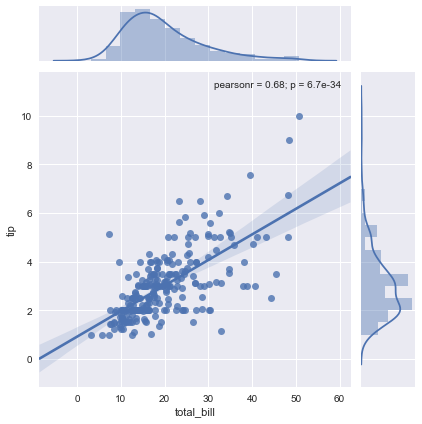

In [86]:
tips = sns.load_dataset('tips')
from scipy import stats
g = sns.jointplot(x='total_bill', y='tip',
                      data=tips, kind="reg", 
                      stat_func=stats.pearsonr, 
                      color=None, size=6, ratio=5, 
                      space=.2, dropna=True, xlim=None, 
                      ylim=None, joint_kws=None, 
                      marginal_kws=None, annot_kws=None)

http://blog.csdn.net/u013082989/article/details/73278458

C:\Users\pc1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


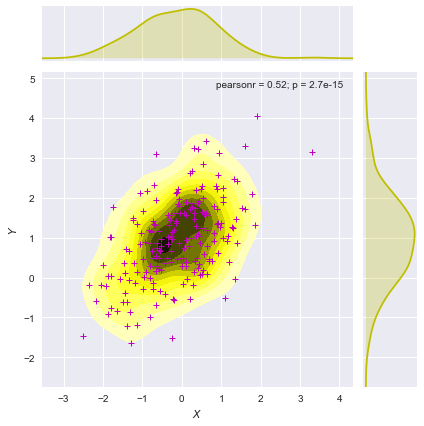

In [88]:
from scipy import stats, integrate
mean, cov = [0, 1], [(1, .5), (.5, 1)] 
data = np.random.multivariate_normal(mean, cov, 200) 
df = pd.DataFrame(data, columns=["x", "y"])

g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="y")
g.plot_joint(plt.scatter, c="m", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)  #画背景网格线
g.set_axis_labels("$X$", "$Y$")

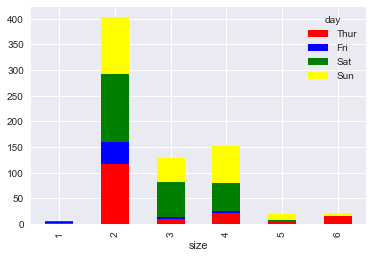

In [104]:
var = tips.groupby(['size', 'day']).tip.sum()
var.unstack().plot(kind='bar', stacked=True, color=['red', 'blue','green','yellow'])
plt.show()

In [ ]:
sns.setstyle('white')
sns.pointplot(x="day",y="tip",data=tips,ci=None,color='black',)

In [73]:
df=pd.read_csv('C:\\Python27\\Scripts\\MCM\\AZ.csv')
year=range(1960,2010)
cm1=['CLCCB','EMCCB','ESCCB','GECCB','HYCCB','LOCCB', 'NGCCB', 'PACCB', 'SOCCB', 'WDCCB', 'WSCCB','SFCCB']
cm2=['CLCCB','ESCCB','GECCB','HYCCB','LOCCB', 'NGCCB','PACCB','SOCCB','WDCCB','WSCCB','WYCCB']
cmy=[]
for j in year:
    if j<1993:
        cmy.append(sum(df[((df.Year)==j)&(df.MSN.isin(cm1[:-1]))].Data)-sum(df[((df.Year)==j)&(df.MSN==cm1[-1])].Data))
    else:
        cmy.append(sum(df[((df.Year)==j)&(df.MSN.isin(cm2))].Data))
        
        
        
in1=['CLICB','EMICB','EMLCB','ESICB','GEICB','HYICB','LOICB','NGICB','PAICB','SFINB','SOICB','WDICB','WSICB']
in2=['CLICB','EMICB','ESICB','GEICB','HYICB','LOICB','NGICB','PAICB','SFINB','SOICB','WDICB','WSICB','WYICB']
iny=[]
for j in year:
    if j<1993:
        iny.append(sum(df[((df.Year)==j)&(df.MSN.isin(in1[:-1]))].Data)-sum(df[((df.Year)==j)&(df.MSN==in1[-1])].Data))
    else:
        iny.append(sum(df[((df.Year)==j)&(df.MSN.isin(in2[:-1]))].Data)-sum(df[((df.Year)==j)&(df.MSN==in2[-1])].Data))
     
     
     
res=['CLRCB','ESRCB','GERCB','LORCB','NGRCB','PARCB','SFRCB ','SORCB ','WDRCB']
resy=[]
for j in year:
     resy.append(sum(df[((df.Year)==j)&(df.MSN.isin(res[:-1]))].Data)-sum(df[((df.Year)==j)&(df.MSN==res[-1])].Data))
     
     
tra1=['CLACB', 'EMACB', 'ESACB', 'LOACB', 'NGACB', 'PAACB']
tra2=['CLACB', 'ESACB', 'LOACB', 'NGACB', 'PAACB']
tray=[]
for j in year:
    if j<1993:
        tray.append(sum(df[((df.Year)==j)&(df.MSN.isin(tra1[:-1]))].Data))
    else:
        tray.append(sum(df[((df.Year)==j)&(df.MSN.isin(tra2[:-1]))].Data))


In [20]:
set('CLACB,NGACB,PAACB,ESACB,LOACB'.split(','))

{'CLACB', 'ESACB', 'LOACB', 'NGACB', 'PAACB'}

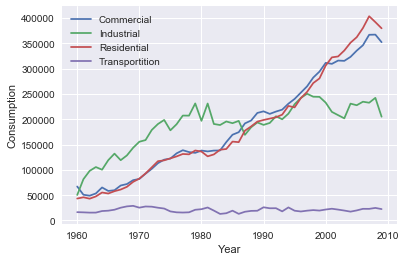

In [74]:
plt.plot(year,cmy,label='Commercial')
plt.plot(year,iny,label='Industrial')
plt.plot(year,resy,label='Residential')
plt.plot(year,tray,label='Transportition')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(loc='upper left')

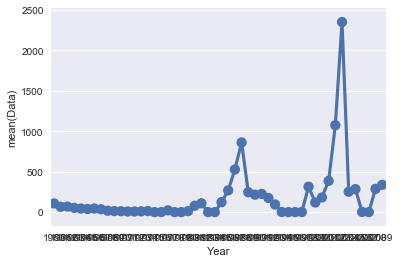

In [83]:
sns.pointplot(x='Year', y='Data', hue=None, data=df, order=None, 
                 hue_order=None,ci=0, 
                 n_boot=0, units=None, markers="o", 
                 linestyles="-", dodge=False, join=True, 
                 scale=1, orient=None, color=None, 
                 palette=None, ax=None, errwidth=None, 
                 capsize=None,linewidth=0.1)

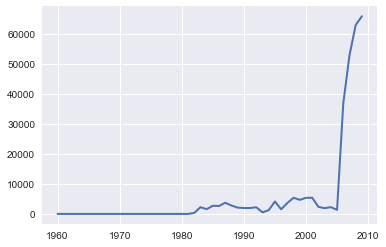

In [106]:
df=pd.read_csv('C:\\Python27\\Scripts\\MCM\\raw.csv')
for s in :
    temp=df[(df.StateCode=='TX')&(df.MSN==s)]
    plt.plot(temp.Year,temp.Data,label=s) 

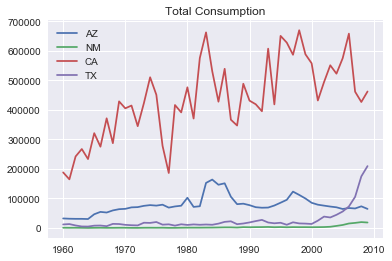

In [7]:
state=['AZ','NM','CA','TX']
consumption=['CLCCB','NGCCB','PACCB','EMCCB','GECCB','HYCCB','SOCCB','WDCCB','WSCCB','ESCCB','LOCCB','SFCCB','WYCCB','CLICB','NGICB','PAICB','EMICB','EMLCB','GEICB','HYICB','SOICB','WDICB','WSICB','ESICB','LOICB','SFINB','WYICB','CLRCB','NGRCB','PARCB','GERCB','SORCB','WDRCB','ESRCB','LORCB','CLACB','NGACB','PAACB','EMACB','ESACB','LOACB','TEACB','TECCB','TEICB','TERCB'
]
production=['HYCCB','GEEGB','HYEGB','SOEGB','WYEGB','HYICB','ENPRP','HYTXB']
total=consumption+production+['ELEXB','ELIMB']
result=[]
x=range(1960,2010)
for s in state:
    df=pd.read_csv('C:\\Python27\\Scripts\\MCM\\'+s+'.csv')
    y=[]
    for year in range(1960,2010):
        y.append(sum(df[(df.MSN.isin(production))&(df.Year==year)].Data))
    result.append(y)
    plt.plot(x,y,label=s)
plt.legend()
plt.title('Total Production')

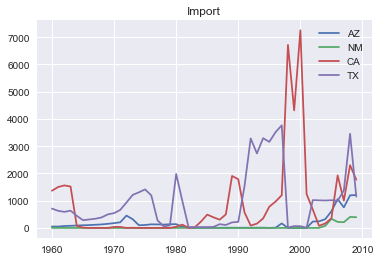

In [10]:
for s in state:
    df=pd.read_csv('C:\\Python27\\Scripts\\MCM\\'+s+'.csv')
    y=df[df.MSN=='ELEXB'].Data.values
    plt.plot(x,y,label=s)
plt.legend()
plt.title('Import')

In [ ]:
#各种类能源占比情况
df=pd.read_csv('AZ.csv')
dic={'coal':['CLRCB','CLCCB','CLICB','CLACB']
    'natural gas':['NGRCB','NGCCB','NGICB','NGACB']
    'All petroleum':['PARCB','PACCB','PAICB','PAACB'],
    'Electricity':['ESRCB','ESCCB','ESICB','ESACB'],
    'electrical energy loss':['LORCB','LOCCB','LOICB','LOACB'],
    'Energy losses and co-products from the production of fuel ethanol':[0,0,'EMLCB',0],
    'Supplemental gaseous fuels':['SFRCB','SFCCB','SFINB',0],
    'Fuel ethanol':[0,'EMCCB','EMICB','EMACB'],
    'geothermal energy and heat pumps':['GERCB','GECCB','GEICB',0],
    'Hydroelectricity':[0,'HYCCB',0,0],
    'Wood':['WDRCB','WDCCB','WDICB']}



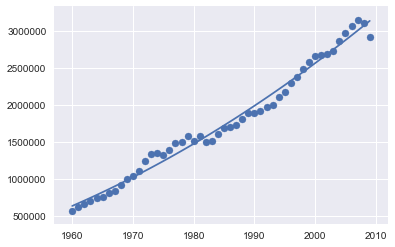

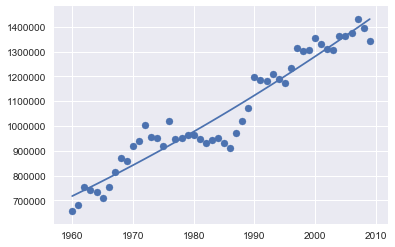

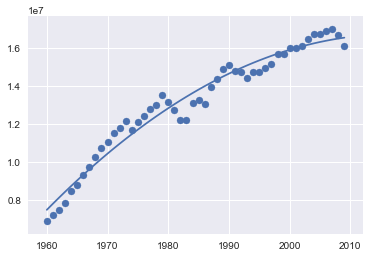

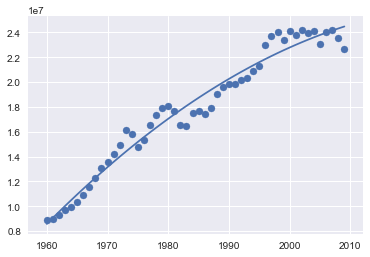

In [12]:
result=[]
for s in state:
    df=pd.read_csv('C:\\Python27\\Scripts\\MCM\\'+s+'.csv')
    y=[]
    for year in range(1960,2010):
        y.append(sum(df[(df.MSN.isin(consumption))&(df.Year==year)].Data))
    result.append(y)
t=range(50)
for i in range(len(result)):
    y=result[i]
    z= np.polyfit(t, y, 2)
    p= np.poly1d(z)
    plt.plot(x,p(t))
    plt.scatter(x,y)
    plt.show()